In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [ ]:
purchases = pd.read_csv('amazon-purchases.csv')
surveys = pd.read_csv('survey.csv')


Clean Purchases Dataset

In [ ]:
purchases = purchases.dropna()
purchases.rename(columns={
    'ASIN/ISBN (Product Code)': 'ASIN/ISBN',
    'Shipping Address State': 'Purchase State'
}, inplace=True)

purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])
purchases['Year'] = purchases['Order Date'].dt.year

if 'Quantity' in purchases.columns and 'Purchase Price Per Unit' in purchases.columns:
    purchases['Total Spending'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']

purchases

,Order Date,Purchase Price Per Unit,Quantity,Purchase State,Title,ASIN/ISBN,Category,Survey ResponseID,Year,Total Spending
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,2018,7.98
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,2018,13.99
3,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,2018,10.45
4,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,2018,10.00
5,2019-02-18,10.99,1.0,NJ,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,2019,10.99
...,...,...,...,...,...,...,...,...,...,...
1850711,2021-04-01,20.75,1.0,MA,50 Feather (Yellow Label) Razor Blades Platinu...,B08P5K9GMJ,RAZOR_BLADE_CARTRIDGE,R_zfqnsBzlOAKibzb,2021,20.75
1850712,2021-04-01,6.99,1.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,6.99
1850713,2021-04-14,15.99,1.0,MA,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,2021,15.99
1850714,2021-05-22,6.99,4.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,27.96


Customer Summary

In [ ]:
customer_summary = pd.merge(purchases, surveys, on='Survey ResponseID', how='inner')

customer_summary

,Order Date,Purchase Price Per Unit,Quantity,Purchase State,Title,ASIN/ISBN,Category,Survey ResponseID,Year,Total Spending,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
0,2018-12-04,7.98,1.0,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,FLASH_MEMORY,R_01vNIayewjIIKMF,2018,7.98,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
1,2018-12-22,13.99,1.0,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,HEADPHONES,R_01vNIayewjIIKMF,2018,13.99,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
2,2018-12-25,10.45,1.0,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,DISHWARE_BOWL,R_01vNIayewjIIKMF,2018,10.45,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
3,2018-12-25,10.00,1.0,NJ,Proraso Shaving Cream for Men,B00837ZOI0,SHAVING_AGENT,R_01vNIayewjIIKMF,2018,10.00,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
4,2019-02-18,10.99,1.0,NJ,Micro USB Cable Android Charger - Syncwire [2-...,B01GFB2E9M,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,2019,10.99,...,No,No,No,No,NaN,Yes if I get part of the profit,Yes if consumers get part of the profit,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675010,2021-04-01,20.75,1.0,MA,50 Feather (Yellow Label) Razor Blades Platinu...,B08P5K9GMJ,RAZOR_BLADE_CARTRIDGE,R_zfqnsBzlOAKibzb,2021,20.75,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675011,2021-04-01,6.99,1.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,6.99,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675012,2021-04-14,15.99,1.0,MA,Sinland Microfiber Cleaning Cloth Dish Cloth K...,B00QGCXPRG,TOWEL,R_zfqnsBzlOAKibzb,2021,15.99,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes
1675013,2021-05-22,6.99,4.0,MA,Tanner's Tasty Paste Vanilla Bling - Anticavit...,B015ZRTHVA,TOOTH_CLEANING_AGENT,R_zfqnsBzlOAKibzb,2021,27.96,...,No,No,No,Yes,NaN,No,No,Yes,I don't know,Yes


Customer Behavior

In [ ]:
customer_behavior = purchases.groupby('Survey ResponseID').agg({
    'Order Date': 'max',      
    'Total Spending': 'sum',        
    'ASIN/ISBN': 'count'
}).reset_index()

customer_behavior

,Survey ResponseID,Order Date,Total Spending,ASIN/ISBN
0,R_01vNIayewjIIKMF,2022-06-10,4231.86,118
1,R_037XK72IZBJyF69,2022-12-13,15894.58,1158
2,R_038ZU6kfQ5f89fH,2022-02-23,3074.47,33
3,R_03aEbghUILs9NxD,2023-01-25,3528.40,158
4,R_06RZP9pS7kONINr,2022-11-15,10424.85,411
...,...,...,...,...
4955,R_zd4E1BgAdaM2761,2022-12-27,12921.29,500
4956,R_zdLOP8JD2pe1brj,2023-02-24,6224.64,315
4957,R_zdQYFhfeqyBd2dH,2023-03-05,5914.46,244
4958,R_zfnsck2ZatnGtY5,2023-03-03,9837.88,570


Trend of customer behavior

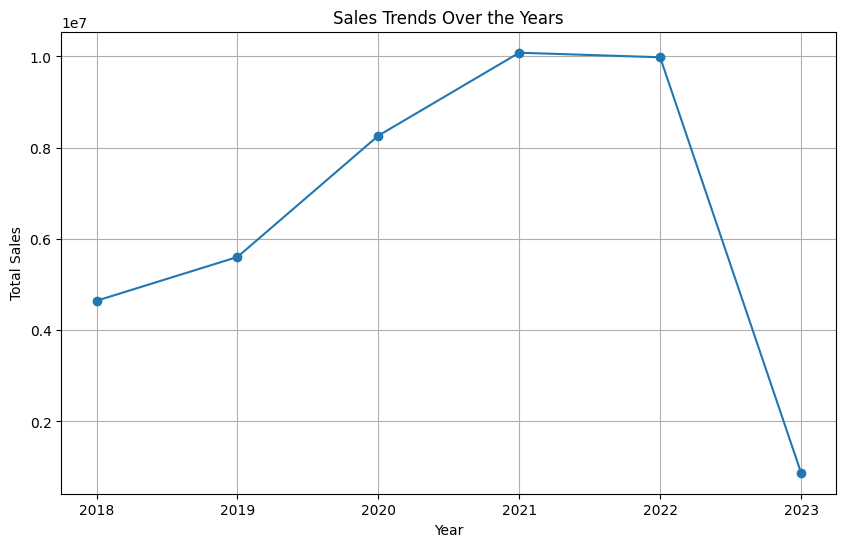

In [ ]:
sales_by_year = purchases.groupby('Year')['Total Spending'].sum().reset_index()

# Create a line plot to show sales trends over the years.
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year['Year'], sales_by_year['Total Spending'], marker='o')
plt.title("Sales Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

Spending of each state

In [ ]:
state_spending = purchases.groupby('Purchase State', as_index=False)['Total Spending'].sum()
state_spending

,Purchase State,Total Spending
0,AK,45940.70
1,AL,418478.17
2,AR,316379.06
3,AZ,722643.15
4,CA,4105586.55
5,CO,692104.57
6,CT,396710.62
7,DC,156190.39
8,DE,198051.60
9,FL,2531409.82


Top 25%

In [ ]:
threshold = state_spending['Total Spending'].quantile(0.75)
high_value_states = state_spending[state_spending['Total Spending'] >= threshold]

print(high_value_states)

   Purchase State  Total Spending
4              CA      4105586.55
9              FL      2531409.82
10             GA      1163964.94
14             IL      1636255.52
19             MA      1025238.34
22             MI      1329997.59
27             NC      1581511.86
34             NY      2238773.86
35             OH      1867317.33
38             PA      2087735.27
44             TX      3076774.65
46             VA      1127364.67
48             WA      1112854.57


Category preference by State

In [ ]:
state_category_summary = purchases.groupby(['Purchase State', 'Category']).agg({
    'Total Spending': 'sum',
    'Quantity': 'sum',
    'ASIN/ISBN': 'count' 
}).reset_index().rename(columns={'ASIN/ISBN': 'OrderCount'})

state_category_summary

,Purchase State,Category,Total Spending,Quantity,OrderCount
0,AK,ABIS_BOOK,1353.92,100.0,99
1,AK,ABIS_LAWN_AND_GARDEN,91.19,7.0,2
2,AK,ABIS_MUSIC,37.67,2.0,2
3,AK,ABRASIVE_SHEETS,37.39,1.0,1
4,AK,ABRASIVE_WHEELS,10.99,1.0,1
...,...,...,...,...,...
61647,WY,WEIGH_SCALE,8.98,1.0,1
61648,WY,WIPER_BLADE,24.99,1.0,1
61649,WY,WIRELESS_AUDIO_ADAPTER,25.99,1.0,1
61650,WY,WRITING_BOARD,43.98,2.0,1


High value customers

In [ ]:
customer_spending = customer_summary.groupby("Survey ResponseID", as_index=False)['Total Spending'].sum()

demographics = surveys[["Survey ResponseID", "Q-demos-age", "Q-demos-income", "Q-demos-state"]]
customer_spending = pd.merge(customer_spending, demographics, on="Survey ResponseID", how="left")

customer_spending

,Survey ResponseID,Total Spending,Q-demos-age,Q-demos-income,Q-demos-state
0,R_01vNIayewjIIKMF,4231.86,35 - 44 years,"$25,000 - $49,999",New Jersey
1,R_037XK72IZBJyF69,15894.58,55 - 64 years,"$25,000 - $49,999",Pennsylvania
2,R_038ZU6kfQ5f89fH,3074.47,25 - 34 years,"$25,000 - $49,999",California
3,R_03aEbghUILs9NxD,3528.40,35 - 44 years,"$50,000 - $74,999",Virginia
4,R_06RZP9pS7kONINr,10424.85,65 and older,"$75,000 - $99,999",South Dakota
...,...,...,...,...,...
4955,R_zd4E1BgAdaM2761,12921.29,25 - 34 years,"$150,000 or more",Illinois
4956,R_zdLOP8JD2pe1brj,6224.64,18 - 24 years,"$50,000 - $74,999",Wisconsin
4957,R_zdQYFhfeqyBd2dH,5914.46,25 - 34 years,"$25,000 - $49,999",Kansas
4958,R_zfnsck2ZatnGtY5,9837.88,25 - 34 years,"$75,000 - $99,999",Ohio


Top 25% customers

In [ ]:
threshold = customer_spending['Total Spending'].quantile(0.75)
customer_spending['Value Segment'] = np.where(customer_spending['Total Spending'] >= threshold, "High Value", "Other")

print(customer_spending[customer_spending['Value Segment'] == "High Value"])
customer_spending

      Survey ResponseID  Total Spending    Q-demos-age       Q-demos-income  \
1     R_037XK72IZBJyF69        15894.58  55 - 64 years    $25,000 - $49,999   
12    R_0BCm9hRP9iTI081        27953.98  25 - 34 years  $100,000 - $149,999   
17    R_0DoXqOQl0hxEeFH        24926.51  35 - 44 years    $25,000 - $49,999   
20    R_0Hzrb8hEmXavTk5        20073.31  25 - 34 years     $150,000 or more   
24    R_0MwMIcbYO11SOwV        14891.02  45 - 54 years    $25,000 - $49,999   
...                 ...             ...            ...                  ...   
4935  R_z1mFB9Qp9HSTCIV        17435.55  45 - 54 years    $50,000 - $74,999   
4940  R_z6wrYNsvTbmmmQ1        11593.05  45 - 54 years    $25,000 - $49,999   
4948  R_zTf2i6s3E2OQZQR        11536.34  55 - 64 years    $25,000 - $49,999   
4950  R_zYlhkltqLl0WShX        12405.32  25 - 34 years    $75,000 - $99,999   
4955  R_zd4E1BgAdaM2761        12921.29  25 - 34 years     $150,000 or more   

     Q-demos-state Value Segment  
1     Pennsylvan

,Survey ResponseID,Total Spending,Q-demos-age,Q-demos-income,Q-demos-state,Value Segment
0,R_01vNIayewjIIKMF,4231.86,35 - 44 years,"$25,000 - $49,999",New Jersey,Other
1,R_037XK72IZBJyF69,15894.58,55 - 64 years,"$25,000 - $49,999",Pennsylvania,High Value
2,R_038ZU6kfQ5f89fH,3074.47,25 - 34 years,"$25,000 - $49,999",California,Other
3,R_03aEbghUILs9NxD,3528.40,35 - 44 years,"$50,000 - $74,999",Virginia,Other
4,R_06RZP9pS7kONINr,10424.85,65 and older,"$75,000 - $99,999",South Dakota,Other
...,...,...,...,...,...,...
4955,R_zd4E1BgAdaM2761,12921.29,25 - 34 years,"$150,000 or more",Illinois,High Value
4956,R_zdLOP8JD2pe1brj,6224.64,18 - 24 years,"$50,000 - $74,999",Wisconsin,Other
4957,R_zdQYFhfeqyBd2dH,5914.46,25 - 34 years,"$25,000 - $49,999",Kansas,Other
4958,R_zfnsck2ZatnGtY5,9837.88,25 - 34 years,"$75,000 - $99,999",Ohio,Other


Graph of respondent spending

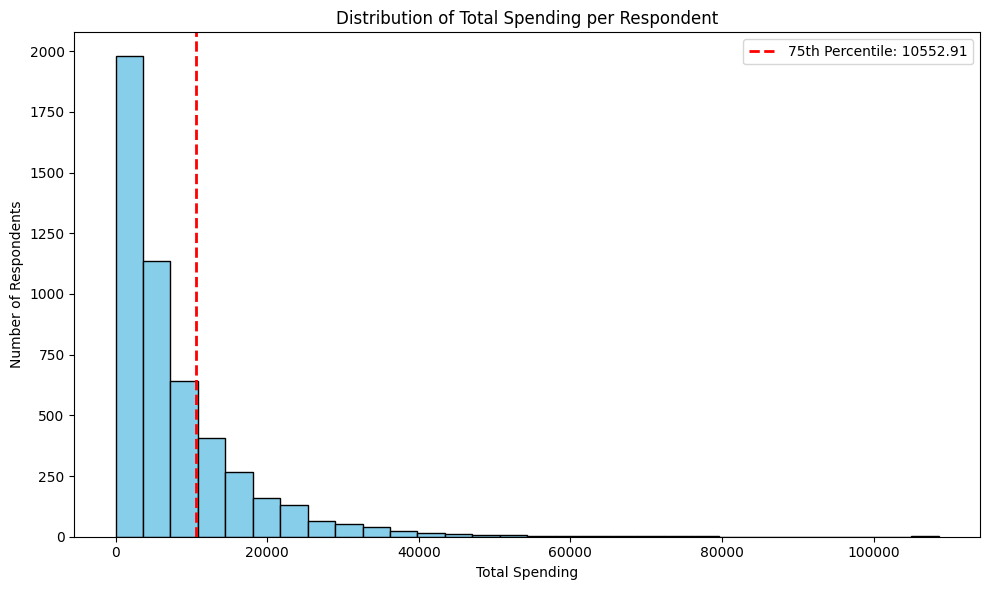

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(customer_spending['Total Spending'], bins=30, edgecolor='black', color='skyblue')
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label=f'75th Percentile: {threshold:.2f}')
plt.title("Distribution of Total Spending per Respondent")
plt.xlabel("Total Spending")
plt.ylabel("Number of Respondents")
plt.legend()
plt.tight_layout()
plt.show()

Demographics of respondents 

In [ ]:

demo_product = customer_summary.groupby(["Q-demos-age", "Q-demos-state", "Q-demos-income", "Category"])\
                .agg({'Total Spending':'sum', 'ASIN/ISBN':'count'})\
                .reset_index().rename(columns={'ASIN/ISBN': 'OrderCount'})


demo_product

,Q-demos-age,Q-demos-state,Q-demos-income,Category,Total Spending,OrderCount
0,18 - 24 years,Alabama,"$100,000 - $149,999",ABIS_BOOK,55.46,1
1,18 - 24 years,Alabama,"$100,000 - $149,999",AMAZON_TABLET,34.99,1
2,18 - 24 years,Alabama,"$100,000 - $149,999",APPAREL,31.84,3
3,18 - 24 years,Alabama,"$100,000 - $149,999",APPAREL_GLOVES,27.48,3
4,18 - 24 years,Alabama,"$100,000 - $149,999",BACKPACK,27.99,1
...,...,...,...,...,...,...
393414,65 and older,Wisconsin,"Less than $25,000",WIG,13.29,1
393415,65 and older,Wisconsin,"Less than $25,000",WILDLIFE_FEEDER,29.95,1
393416,65 and older,Wisconsin,"Less than $25,000",WINDOW_FILM,72.97,3
393417,65 and older,Wisconsin,"Less than $25,000",WRITING_INSTRUMENT,7.98,1


age and category

In [ ]:
age_category = customer_summary.groupby(["Q-demos-age", "Category"]).agg(
    TotalSpendingSum=('Total Spending', 'sum'),
    OrderCount=('ASIN/ISBN', 'count')
).reset_index()
age_category

,Q-demos-age,Category,TotalSpendingSum,OrderCount
0,18 - 24 years,3D_PRINTER,501.94,5
1,18 - 24 years,ABDOMINAL_EXERCISER,346.40,21
2,18 - 24 years,ABIS_BOOK,185689.15,10330
3,18 - 24 years,ABIS_DRUGSTORE,50.25,6
4,18 - 24 years,ABIS_DVD,555.51,32
...,...,...,...,...
9904,65 and older,WRITING_INSTRUMENT,1437.09,134
9905,65 and older,WRITING_PAPER,67.70,3
9906,65 and older,YARN,784.79,53
9907,65 and older,YO_YO,41.98,2


In [ ]:
top_category_by_age = age_category.loc[age_category.groupby("Q-demos-age")["OrderCount"].idxmax()].reset_index(drop=True)
top_category_by_age

,Q-demos-age,Category,TotalSpendingSum,OrderCount
0,18 - 24 years,ABIS_BOOK,185689.15,10330
1,25 - 34 years,ABIS_BOOK,427737.06,25772
2,35 - 44 years,ABIS_BOOK,341234.88,25181
3,45 - 54 years,ABIS_BOOK,212040.64,14279
4,55 - 64 years,ABIS_BOOK,102750.42,6438
5,65 and older,ABIS_BOOK,39430.61,2738


graph

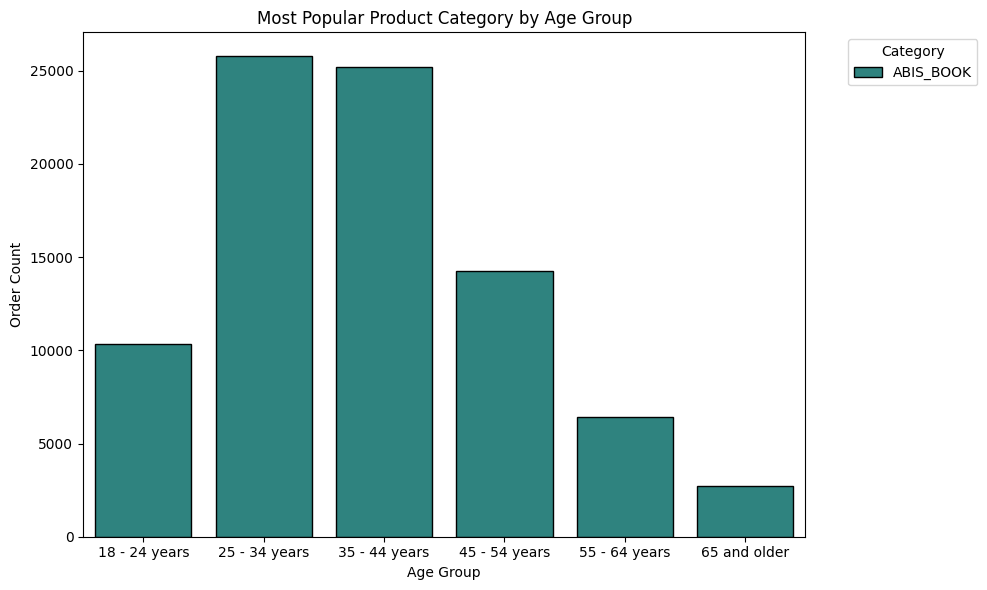

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_category_by_age, x="Q-demos-age", y="OrderCount", hue="Category", dodge=False, palette="viridis", edgecolor="black")
plt.title("Most Popular Product Category by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Order Count")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

state and category

In [ ]:
state_category = customer_summary.groupby(["Q-demos-state", "Category"]).agg(
    TotalSpendingSum=('Total Spending', 'sum'),
    OrderCount=('ASIN/ISBN', 'count')
).reset_index()

state_category

,Q-demos-state,Category,TotalSpendingSum,OrderCount
0,Alabama,3D_PRINTER,39.99,1
1,Alabama,ABIS_BOOK,14817.37,940
2,Alabama,ABIS_DVD,301.62,17
3,Alabama,ABIS_ELECTRONICS,69.99,1
4,Alabama,ABIS_GIFT_CARD,195.00,9
...,...,...,...,...
61595,Wyoming,WEIGH_SCALE,8.98,1
61596,Wyoming,WIPER_BLADE,24.99,1
61597,Wyoming,WIRELESS_AUDIO_ADAPTER,25.99,1
61598,Wyoming,WRITING_BOARD,43.98,1


In [ ]:
top_category_by_state = state_category.loc[state_category.groupby("Q-demos-state")["OrderCount"].idxmax()].reset_index(drop=True)
top_category_by_state

,Q-demos-state,Category,TotalSpendingSum,OrderCount
0,Alabama,ABIS_BOOK,14817.37,940
1,Alaska,ABIS_BOOK,1766.03,111
2,Arizona,ABIS_BOOK,23627.56,1620
3,Arkansas,ABIS_BOOK,14347.40,840
4,California,ABIS_BOOK,119721.80,7580
5,Colorado,ABIS_BOOK,26170.05,1553
6,Connecticut,ABIS_BOOK,14433.55,877
7,Delaware,ABIS_BOOK,4686.79,303
8,District of Columbia,PET_FOOD,8660.06,383
9,Florida,ABIS_BOOK,74047.33,4563


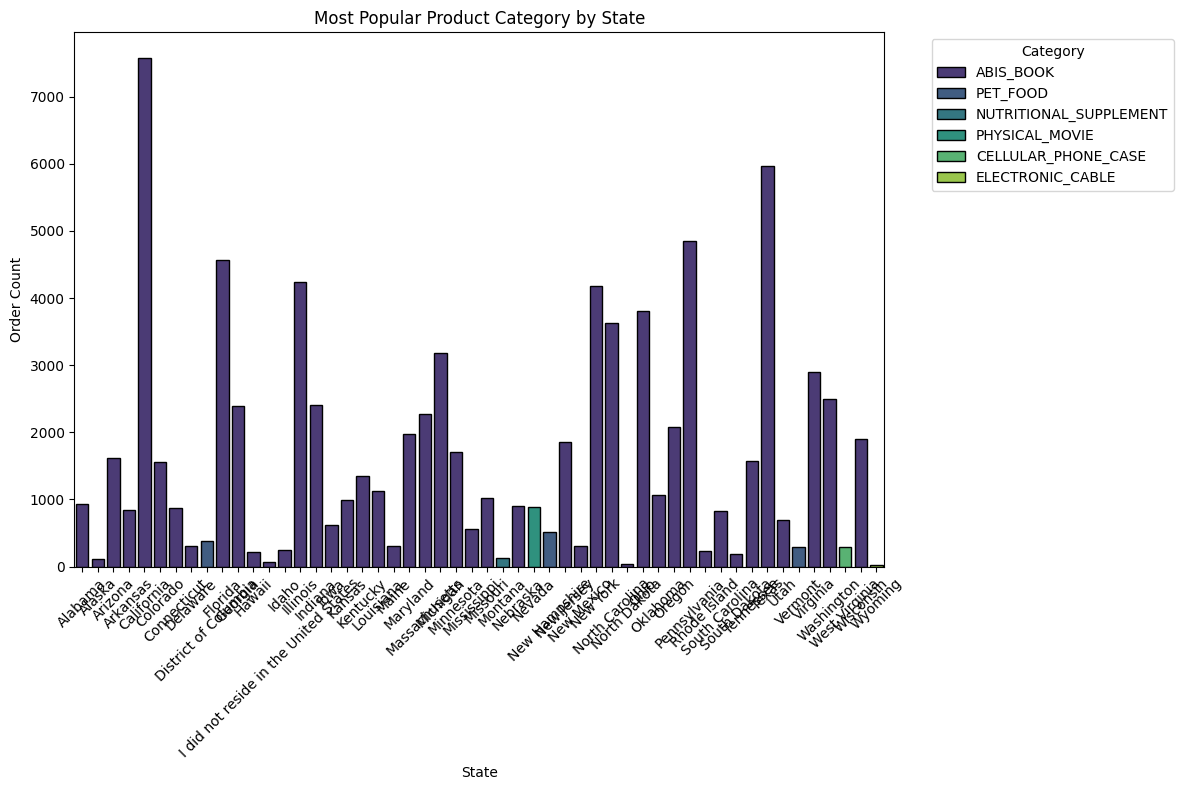

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(
    data=top_category_by_state, 
    x="Q-demos-state", 
    y="OrderCount", 
    hue="Category", 
    dodge=False, 
    palette="viridis",
    edgecolor="black"
)
plt.title("Most Popular Product Category by State")
plt.xlabel("State")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

popularity order for each state

In [ ]:
combined_df = customer_summary.groupby(["Q-demos-state", "Category"], as_index=False).agg(OrderCount=('ASIN/ISBN', 'count'))
combined_df['Rank'] = combined_df.groupby('Q-demos-state')['OrderCount'].rank(method='min', ascending=False).astype(int)

combined_df = combined_df.sort_values(["Q-demos-state", "Rank"]).reset_index(drop=True)

combined_df

,Q-demos-state,Category,OrderCount,Rank
0,Alabama,ABIS_BOOK,940,1
1,Alabama,PET_FOOD,394,2
2,Alabama,SHIRT,342,3
3,Alabama,COFFEE,231,4
4,Alabama,TOY_FIGURE,229,5
...,...,...,...,...
61595,Wyoming,WATER_FLOTATION_DEVICE,1,136
61596,Wyoming,WEIGH_SCALE,1,136
61597,Wyoming,WIPER_BLADE,1,136
61598,Wyoming,WIRELESS_AUDIO_ADAPTER,1,136


In [ ]:
specific_state = "Oregon"
state_ranking = combined_df[combined_df["Q-demos-state"] == specific_state]
state_ranking

,Q-demos-state,Category,OrderCount,Rank
45357,Oregon,ABIS_BOOK,2081,1
45358,Oregon,PET_FOOD,599,2
45359,Oregon,NUTRITIONAL_SUPPLEMENT,570,3
45360,Oregon,SHIRT,478,4
45361,Oregon,VEGETABLE,333,5
...,...,...,...,...
46784,Oregon,VIDEO_GAME_HARDWARE,1,1256
46785,Oregon,WATER_HEATER,1,1256
46786,Oregon,WEIGHT_PLATE,1,1256
46787,Oregon,WORKBENCH,1,1256


income bracket and category

In [ ]:
income_category = customer_summary.groupby(["Q-demos-income", "Category"]).agg(
    TotalSpendingSum=('Total Spending', 'sum'),
    OrderCount=('ASIN/ISBN', 'count')
).reset_index()

income_category

,Q-demos-income,Category,TotalSpendingSum,OrderCount
0,"$100,000 - $149,999",3D_GLASSES,9.99,1
1,"$100,000 - $149,999",3D_PRINTER,8422.56,36
2,"$100,000 - $149,999",3D_PRINTING_PEN,59.99,1
3,"$100,000 - $149,999",ABDOMINAL_EXERCISER,964.45,32
4,"$100,000 - $149,999",ABIS_APPAREL,13.94,2
...,...,...,...,...
11311,Prefer not to say,WRITING_INSTRUMENT,1687.57,129
11312,Prefer not to say,WRITING_PAPER,56.82,6
11313,Prefer not to say,YARN,255.40,21
11314,Prefer not to say,YO_YO,12.99,1


In [ ]:
top_category_by_income = income_category.loc[
    income_category.groupby("Q-demos-income")["OrderCount"].idxmax()
].reset_index(drop=True)

top_category_by_income

,Q-demos-income,Category,TotalSpendingSum,OrderCount
0,"$100,000 - $149,999",ABIS_BOOK,252391.52,17374
1,"$150,000 or more",ABIS_BOOK,204999.50,12820
2,"$25,000 - $49,999",ABIS_BOOK,232833.78,15268
3,"$50,000 - $74,999",ABIS_BOOK,262948.14,16422
4,"$75,000 - $99,999",ABIS_BOOK,212861.74,13996
5,"Less than $25,000",ABIS_BOOK,127906.58,7977
6,Prefer not to say,ABIS_BOOK,14941.50,881


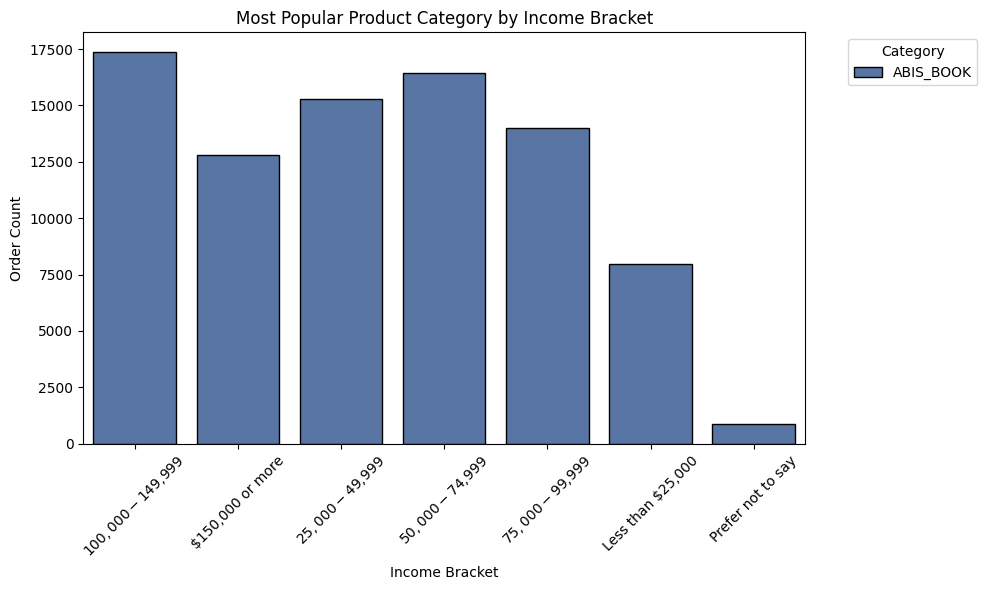

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_category_by_income,
            x="Q-demos-income",
            y="OrderCount",
            hue="Category",
            dodge=False,
            palette="deep",
            edgecolor="black")
plt.title("Most Popular Product Category by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()